In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# **Import Linear Dattaset**

In [3]:
df1=pd.read_csv('linear_data.csv') 
df1.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [4]:
x_linear=df1[['x']] 
y_linear=df1[['y']]

# **Import Non-Linear dataset**

In [5]:
df2=pd.read_csv('nonlinear_data.csv') 
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [6]:
x_nonlinear=df2[['x']] 
y_nonlinear=df2[['y']] 

# **Visual Representation**

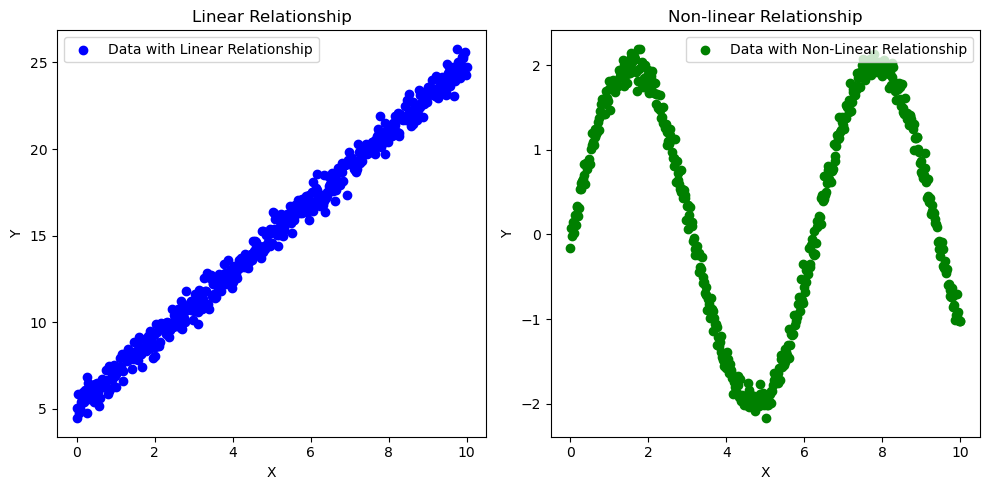

In [7]:
#linear 
plt.figure(figsize=(10,5)) 
plt.subplot(1,2,1) 
plt.scatter(x_linear,y_linear,color='blue',label='Data with Linear Relationship') 
plt.xlabel('X') 
plt.ylabel('Y') 
plt.title('Linear Relationship') 
plt.legend() 

#non-linear 
plt.subplot(1,2,2) 
plt.scatter(x_nonlinear,y_nonlinear,color='green',label='Data with Non-Linear Relationship') 
plt.xlabel('X') 
plt.ylabel('Y') 
plt.title('Non-linear Relationship') 
plt.legend() 

plt.tight_layout() 
plt.show() 

In [8]:
df1.corr() #linear 

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [9]:
df2.corr() #non linear 

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


# **Linear**

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg1=LinearRegression()

In [12]:
reg1.fit(x_linear,y_linear) #x=x_linear.reshape(-1,1)

LinearRegression()

In [13]:
reg1.score(x_linear,y_linear)

0.9928923730526016

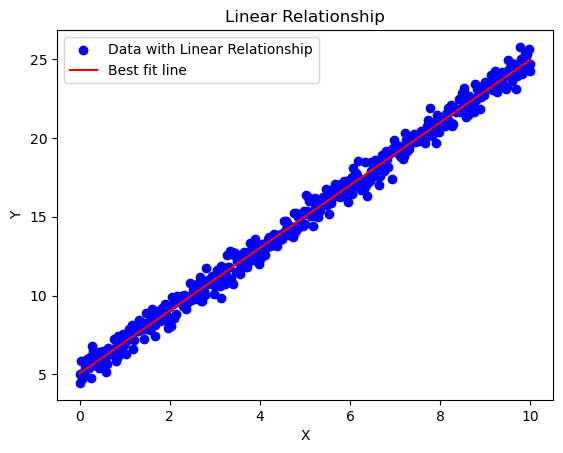

In [14]:
plt.scatter(x_linear,y_linear,color='blue',label='Data with Linear Relationship') 
plt.plot(x_linear,reg1.predict(x_linear),color='red',label='Best fit line') 
plt.xlabel('X') 
plt.ylabel('Y') 
plt.title('Linear Relationship') 
plt.legend() 

# **Non Linear**

In [15]:
reg2=LinearRegression()

In [16]:
reg2.fit(x_nonlinear,y_nonlinear)

LinearRegression()

In [17]:
reg2.score(x_nonlinear,y_nonlinear)

0.004321199719043656

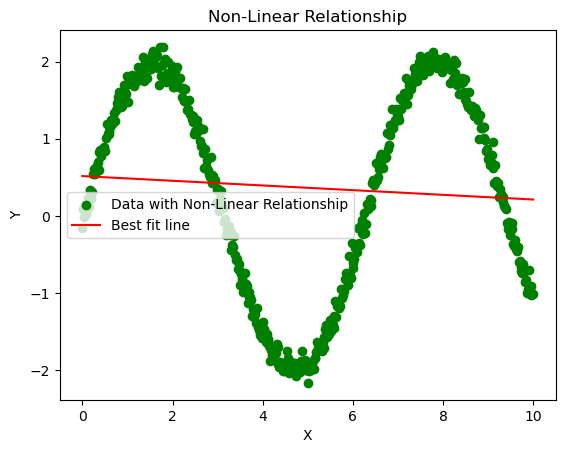

In [18]:
plt.scatter(x_nonlinear,y_nonlinear,color='green',label='Data with Non-Linear Relationship') 
plt.plot(x_nonlinear,reg2.predict(x_nonlinear),color='red',label='Best fit line') 
plt.xlabel('X') 
plt.ylabel('Y') 
plt.title('Non-Linear Relationship') 
plt.legend() 

# **Polynomial Regression**

In [19]:
from sklearn.preprocessing import PolynomialFeatures 

In [23]:
poly=PolynomialFeatures(degree=6) #polynomial regression with degree 2
X_poly=poly.fit_transform(x_nonlinear)

In [29]:
X_poly.shape #(6 degree+1)!/6!1! so 7 features

(500, 7)

In [25]:
reg_poly=LinearRegression()

In [26]:
reg_poly.fit(X_poly,y_nonlinear) 

LinearRegression()

In [27]:
reg_poly.score(X_poly,y_nonlinear)

0.9930624844497352

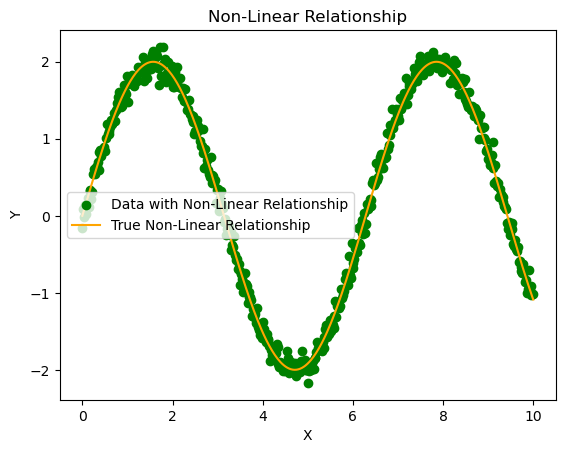

In [28]:
plt.scatter(x_nonlinear,y_nonlinear,color='green',label='Data with Non-Linear Relationship') 
plt.plot(x_nonlinear,2*np.sin(x_nonlinear),color='orange',label='True Non-Linear Relationship') 
plt.xlabel('X') 
plt.ylabel('Y') 
plt.title('Non-Linear Relationship') 
plt.legend() 

# **Seperate Train Test**

In [30]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(X_poly,y_nonlinear,test_size=30,random_state=1)

In [31]:
reg=LinearRegression() 

In [32]:
reg.fit(xtrain,ytrain) 

LinearRegression()

# **Testing Score**

In [33]:
reg.score(xtest,ytest) 

0.9895406823700347

# **Training Score**

In [34]:
reg.score(xtrain,ytrain)

0.9932157716838904